In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import datetime

In [2]:
! ls Weather_AD_WIP/data

spray.csv.zip   test.csv.zip    train.csv.zip   weather.csv.zip west_nile.zip


In [3]:
train = pd.read_csv('Weather_AD_WIP/data/train.csv.zip')
weather = pd.read_csv('Weather_AD_WIP/data/weather.csv.zip')
spray = pd.read_csv('Weather_AD_WIP/data/spray.csv.zip')
test = pd.read_csv('Weather_AD_WIP/data/test.csv.zip')

## Motivation

The motivation behind this project was to create a model that may predict when and where different species of mosquitos will test positive with the West Nile virus. Permitting the City of Chicago and the Chicago Department of Public Health (CPHD) to efficiently and effectively allocate their resources towards the prevention of the West Nile Virus. 

Notes: 

Find the correlation between Tavg and Dates.



-------

# Weather: 

----------

In [4]:
weather.head(2)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6


In [5]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ KB


In [6]:
weather.describe()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,6.960666,17.494905
std,0.500085,11.461970,10.381939,10.675181,3.587527,10.063609
min,1.000000,41.000000,29.000000,22.000000,0.100000,1.000000
25%,1.000000,69.000000,50.000000,46.000000,4.300000,7.000000
50%,1.500000,78.000000,59.000000,54.000000,6.400000,19.000000
75%,2.000000,85.000000,66.000000,62.000000,9.200000,25.000000
max,2.000000,104.000000,83.000000,75.000000,24.100000,36.000000


## Correlation Heatmap:

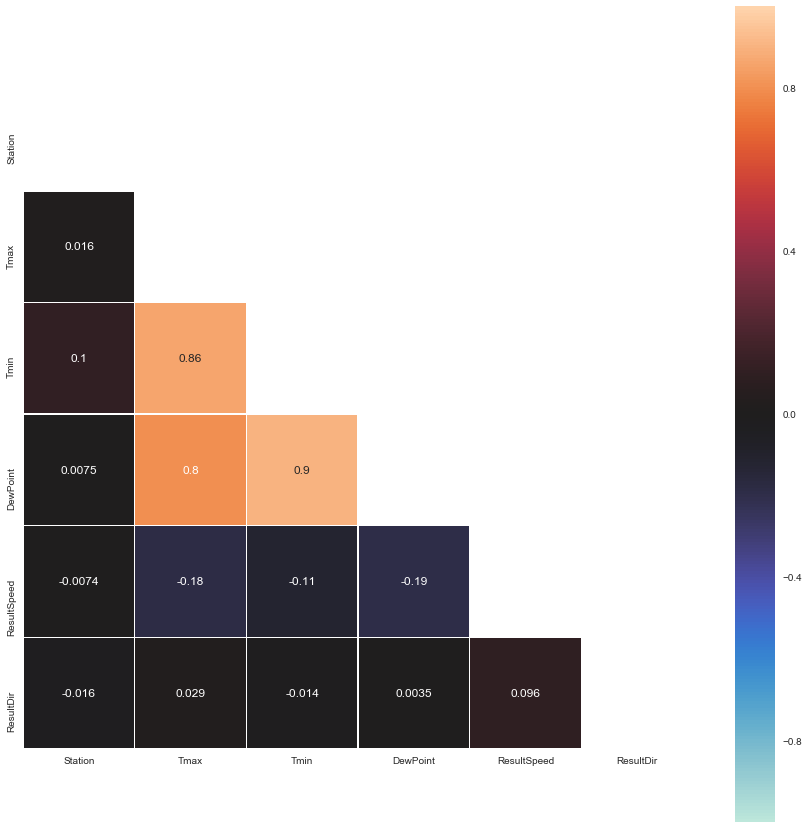

In [7]:
sns.set(style="white")

corr = weather.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(corr, annot = True, mask=mask, vmin = -1, vmax= 1, center=0,
            square=True, linewidths=.3);

## Dropping Columns:

In [8]:
weather.drop('Depart', 1,inplace=True)

In [9]:
weather.drop('Depth', 1,inplace=True)

In [10]:
weather.drop('Water1', 1,inplace=True)

In [11]:
weather.drop('SnowFall', 1,inplace=True)

In [12]:
# weather.drop('StnPressure', 1,inplace=True)

In [13]:
weather.drop('SeaLevel', 1,inplace=True)

In [14]:
# weather.drop('Sunrise', 1,inplace=True)

In [15]:
# weather.drop('Sunset', 1,inplace=True)

In [16]:
weather.drop('Heat', 1,inplace=True)

In [17]:
weather.drop('Cool', 1,inplace=True)

In [18]:
weather.drop('ResultSpeed', 1,inplace=True)

In [19]:
weather.head(2)

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,51,56,0448,1849,,0.00,29.10,27,9.2
1,2,2007-05-01,84,52,68,51,57,-,-,,0.00,29.18,25,9.6


## Exploring the Data:
-------

#### Date Values:

In [20]:
weather.Date.sort_values(ascending = False).unique()

array(['2014-10-31', '2014-10-30', '2014-10-29', ..., '2007-05-03',
       '2007-05-02', '2007-05-01'], dtype=object)

#### Maximum Temperature per Day:

In [21]:
weather.Tmax.sort_values(ascending = False).unique()

array([104, 103, 102, 101, 100,  99,  98,  97,  96,  95,  94,  93,  92,
        91,  90,  89,  88,  87,  86,  85,  84,  83,  82,  81,  80,  79,
        78,  77,  76,  75,  74,  73,  72,  71,  70,  69,  68,  67,  66,
        65,  64,  63,  62,  61,  60,  59,  58,  57,  56,  55,  54,  53,
        52,  51,  50,  49,  48,  47,  46,  45,  44,  42,  41])

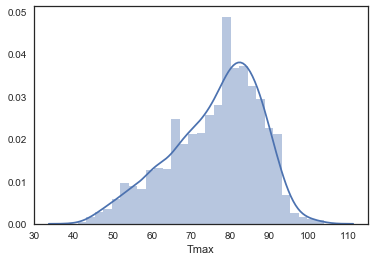

In [22]:
sns.distplot(weather.Tmax)

#### Minimum Temperature per Day:

In [23]:
weather.Tmin.sort_values(ascending = False).unique()

array([83, 82, 81, 80, 79, 78, 77, 76, 75, 74, 73, 72, 71, 70, 69, 68, 67,
       66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50,
       49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33,
       32, 31, 29])

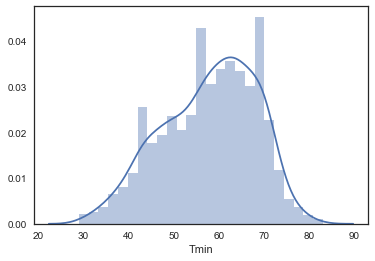

In [24]:
sns.distplot(weather.Tmin)

#### Average Temperature per Day:

In [25]:
weather.Tavg.sort_values(ascending = False).unique()

array(['M', '94', '93', '92', '91', '90', '89', '88', '87', '86', '85',
       '84', '83', '82', '81', '80', '79', '78', '77', '76', '75', '74',
       '73', '72', '71', '70', '69', '68', '67', '66', '65', '64', '63',
       '62', '61', '60', '59', '58', '57', '56', '55', '54', '53', '52',
       '51', '50', '49', '48', '47', '46', '45', '44', '43', '42', '41',
       '40', '39', '38', '37', '36'], dtype=object)

#### DewPoint per Day:

- Dew points indicate the amount moisture in the air. The higher the dew points, the higher the moisture content of the air at a given temperature. Dew point temperature is defined as the temperature to which the air would have to cool (at constant pressure and constant water vapor content) in order to reach saturation.

In [26]:
weather.DewPoint.sort_values(ascending = False).unique()

array([75, 74, 73, 72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59,
       58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42,
       41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25,
       24, 23, 22])

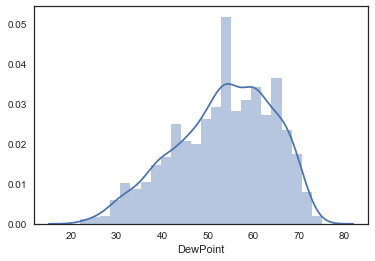

In [27]:
sns.distplot(weather.DewPoint)

#### Wet Bulb:

In [28]:
weather.WetBulb.sort_values(ascending = False).unique()

array(['M', '78', '77', '76', '75', '74', '73', '72', '71', '70', '69',
       '68', '67', '66', '65', '64', '63', '62', '61', '60', '59', '58',
       '57', '56', '55', '54', '53', '52', '51', '50', '49', '48', '47',
       '46', '45', '44', '43', '42', '41', '40', '39', '38', '37', '36',
       '35', '34', '33', '32'], dtype=object)

#### CodeSum Inedex: 

**Weather Phenomena:**

- `+FC TORNADO/WATERSPOUT`
- `FC FUNNEL CLOUD`
- `TS THUNDERSTORM`
- `GR HAIL`
- `RA RAIN`
- `DZ DRIZZLE`
- `SN SNOW`
- `SG SNOW GRAINS`
- `GS SMALL HAIL &/OR SNOW PELLETS`
- `PL ICE PELLETS`
- `IC ICE CRYSTALS`
- `FG+ HEAVY FOG (FG & LE.25 MILES VISIBILITY)`
- `FG FOG`
- `BR MIST`
- `UP UNKNOWN PRECIPITATION`
- `HZ HAZE`
- `FU SMOKE`
- `VA VOLCANIC ASH`
- `DU WIDESPREAD DUST`
- `DS DUSTSTORM`
- `PO SAND/DUST WHIRLS`
- `SA SAND`
- `SS SANDSTORM`
- `PY SPRAY`
- `SQ SQUALL`
- `DR LOW DRIFTING`
- `SH SHOWER`
- `FZ FREEZING`
- `MI SHALLOW`
- `PR PARTIAL`
- `BC PATCHES`
- `BL BLOWING`
- `VC VICINITY`
- `- LIGHT`
- `+ HEAVY`
- `"NO SIGN" MODERATE `


In [29]:
weather.CodeSum.sort_values(ascending = False).unique()

array(['VCTS', 'TSRA RA VCTS', 'TSRA RA HZ FU', 'TSRA RA HZ',
       'TSRA RA FG+ FG BR HZ', 'TSRA RA FG+ FG BR', 'TSRA RA FG+ BR',
       'TSRA RA FG BR', 'TSRA RA DZ BR HZ', 'TSRA RA DZ BR',
       'TSRA RA BR VCTS', 'TSRA RA BR HZ VCTS', 'TSRA RA BR HZ',
       'TSRA RA BR', 'TSRA RA', 'TSRA HZ', 'TSRA FG+ BR HZ',
       'TSRA FG+ BR', 'TSRA DZ FG+ FG BR HZ', 'TSRA DZ BR HZ',
       'TSRA BR SQ', 'TSRA BR HZ VCTS', 'TSRA BR HZ FU', 'TSRA BR HZ',
       'TSRA BR', 'TSRA', 'TS TSRA VCFG', 'TS TSRA RA VCTS',
       'TS TSRA RA HZ', 'TS TSRA RA FG BR HZ', 'TS TSRA RA FG BR',
       'TS TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS', 'TS TSRA RA BR HZ',
       'TS TSRA RA BR', 'TS TSRA RA', 'TS TSRA HZ', 'TS TSRA GR RA BR',
       'TS TSRA BR HZ', 'TS TSRA BR', 'TS TSRA', 'TS RA FG+ FG BR',
       'TS RA BR HZ', 'TS RA BR', 'TS RA', 'TS HZ', 'TS BR HZ', 'TS BR',
       'TS', 'RA VCTS', 'RA SN BR', 'RA SN', 'RA HZ', 'RA FG+ MIFG BR',
       'RA FG+ BR', 'RA FG BR', 'RA DZ SN', 'RA DZ FG+ FG BR

#### Wind Direction:

- Vector as a combination of the vector's magnitude (length) and its direction (of the wind).

In [30]:
weather.ResultDir.sort_values(ascending = False).unique()

array([36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20,
       19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,
        2,  1])

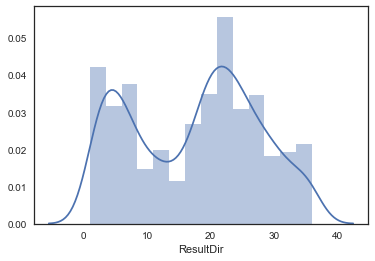

In [31]:
sns.distplot(weather.ResultDir)

#### Average Wind Speed:

- Resultant wind speed values are obtained by converting the 5-minute wind speeds and directions for the hour into a single hourly vector. Resultant wind speed is the magnitude of this vector.

In [32]:
weather.AvgSpeed.sort_values(ascending = False).unique()

array(['M', '9.9', '9.8', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1',
       '9.0', '8.9', '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2',
       '8.1', '8.0', '7.9', '7.8', '7.7', '7.6', '7.5', '7.4', '7.3',
       '7.2', '7.1', '7.0', '6.9', '6.8', '6.7', '6.6', '6.5', '6.4',
       '6.3', '6.2', '6.1', '6.0', '5.9', '5.8', '5.7', '5.6', '5.5',
       '5.4', '5.3', '5.2', '5.1', '5.0', '4.9', '4.8', '4.7', '4.6',
       '4.5', '4.4', '4.3', '4.2', '4.1', '4.0', '3.9', '3.8', '3.7',
       '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3.0', '26.3', '23.2',
       '23.1', '22.9', '22.6', '22.1', '21.5', '21.4', '20.7', '20.2',
       '2.9', '2.8', '2.7', '2.6', '2.4', '2.3', '2.1', '2.0', '19.9',
       '19.5', '19.3', '18.9', '18.8', '18.5', '18.4', '18.2', '18.1',
       '18.0', '17.9', '17.8', '17.7', '17.6', '17.4', '17.3', '17.2',
       '17.1', '16.9', '16.8', '16.7', '16.6', '16.4', '16.3', '16.2',
       '16.1', '16.0', '15.9', '15.8', '15.7', '15.6', '15.5', '15.4',
       

---------

## Cleaning Missing Values:

#### Cleaning Code Sum:



In [33]:
weather.replace(' ', 'NA', inplace=True)

#### Cleaning Average Temperature:

In [34]:
weather.Tavg.replace('M', 0.0, inplace=True);  # 11 Missing Values

In [35]:
weather.Tavg = weather.Tavg.astype('float32')

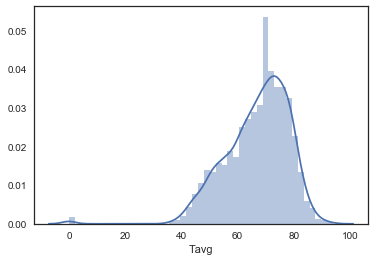

In [36]:
sns.distplot(weather.Tavg)

#### Cleaning Wet Bulb:

In [37]:
weather.WetBulb.replace('M', 0, inplace=True); # 11

In [38]:
weather.WetBulb = weather.WetBulb.astype(int)

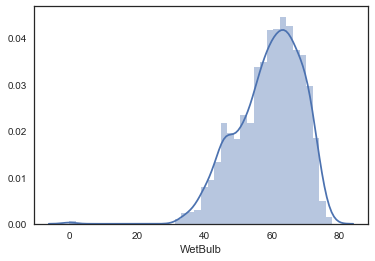

In [39]:
sns.distplot(weather.WetBulb)

#### Cleaning Total Precipitation:

In [40]:
sum(weather.PrecipTotal == 'M')

2

In [41]:
sum(weather.PrecipTotal == '  T')

318

In [42]:
weather.PrecipTotal.replace('M', 0.0, inplace=True);
weather.PrecipTotal.replace('  T', 0.0, inplace=True); ## What to do with T

In [43]:
weather.PrecipTotal = weather.PrecipTotal.astype('float32')

#### Cleaning Average Wind Speed:

In [44]:
weather.AvgSpeed.replace('M', 0.0, inplace=True); # 3 missing values

In [45]:
weather.AvgSpeed = weather.AvgSpeed.astype('float32')

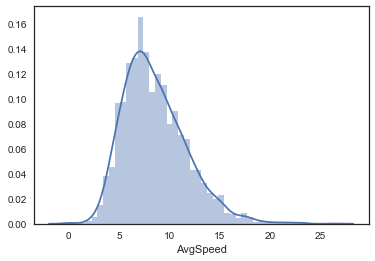

In [46]:
sns.distplot(weather.AvgSpeed)

#### Cleaning Heat - July through December:

- A measure of how much (in degrees), and for how long (in days), outside air temperature was lower than a specific "base temperature" (or "balance point"). They are used for calculations relating to the energy consumption required to heat buildings.


In [47]:
# sum(weather.Heat == 'M')

In [48]:
# weather.Heat.replace('M', 0, inplace=True); # 11 missing values

In [49]:
# weather.Heat = weather.Heat.astype(int)

In [50]:
# sns.distplot(weather.Heat);

#### Cleaning Cool - January through June:

- "Cooling degree days", or "CDD", are a measure of how much (in degrees), and for how long (in days), outside air temperature was higher than a specific base temperature. They are used for calculations relating to the energy consumption required to cool buildings.

In [51]:
# sum(weather.Cool == 'M')

In [52]:
# weather.Cool.replace('M', 0, inplace=True); # 11 missing values

In [53]:
# weather.Cool = weather.Cool.astype(int)

#### Cleaning - Pressure

- INCHES OF HG

In [54]:
sum(weather.StnPressure == 'M')

4

In [55]:
weather.StnPressure.replace('M', 0, inplace=True); # 11 missing values

In [56]:
weather.StnPressure = weather.StnPressure.astype('float32')

#### Cleaning - Sunrise:

In [ ]:
datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

In [127]:
weather.Sunrise.strftime()

AttributeError: 'Series' object has no attribute 'strftime'

-----

## Feature Engineering CodeSum Values:

#### Combining - Rain/Drizzle:

- TS THUNDERSTORM
- GR HAIL
- RA RAIN
- DZ DRIZZLE
- SH SHOWER

In [57]:
rain = ['RA', 'DZ', 'SH', 'TS', 'GR']

In [58]:
def filter_codesum(x):
    for code in rain:
        if code in x:
            return 1
        else:
            return 0

In [59]:
weather['rain'] = weather.CodeSum.apply(filter_codesum)

In [60]:
weather.rain.value_counts()

0    1909
1    1035
Name: rain, dtype: int64

In [61]:
#weather[weather.rain != 0]

#### Combining - Snow:

- SN SNOW
- SG SNOW GRAINS
- GS SMALL HAIL &/OR SNOW PELLETS
- PL ICE PELLETS
- IC ICE CRYSTALS
- DR LOW DRIFTING*
- BC PATCHES*

In [62]:
snow = ['SN','SG','GS','PL','IC','DR','BC']

In [63]:
def filter_codesum(x):
    for code in snow:
        if code in x:
            return 1
#         elif:
        else:
            return 0

In [64]:
weather['snow'] = weather.CodeSum.apply(filter_codesum)

In [65]:
weather.snow.value_counts()

0    2938
1       6
Name: snow, dtype: int64

#### Combining - Fog/Mist:
- `FG+ HEAVY FOG (FG & LE.25 MILES VISIBILITY)`
- `FG FOG`
- `BR MIST`

In [66]:
# fog = ['FG+','FG','BR']

In [67]:
# def filter_codesum(x):
#     for code in fog:
#         if code in x:
#             return 1
#         else:
#             return 0

In [68]:
# weather['fog'] = weather.CodeSum.apply(filter_codesum)

In [69]:
# weather.fog.value_counts()

### Filtering Weather Dates using Spray Dates:

In [70]:
dates_list = spray.Date.value_counts().index

In [71]:
weather.Date = pd.to_datetime(weather.Date, dayfirst=True)

In [72]:
weather.loc[(weather['AvgSpeed'] > 5) & (weather['Date'].isin(dates_list)), 'spray_ineffective']=1

In [73]:
weather.spray_ineffective.fillna(0, inplace=True)

## Calculating Relative Humidity:

- Celsius = (Fahrenheit - 32) * 5.0/9.0


- Relative Humidity Formula = 100 * (EXP((17.625 * Dew Point) / (243.04 + Dew Point)) / EXP((17.625 * Temperature) / (243.04 + Temperature)))

#### Converting to Celsius:

In [74]:
def celsius(x):
    c = ((x - 32) * 5.0)/9.0
    return float(c)

In [75]:
# weather['DewPoint'];

In [76]:
# weather['DewPoint'].apply(celsius);

In [77]:
# weather['DewPoint'] = weather['DewPoint'].apply(celsius)

In [78]:
# weather['Tavg'] = weather['Tavg'].apply(celsius)

In [79]:
# weather['Tmax'] = weather['Tmax'].apply(celsius)

In [80]:
# weather['Tmin'] = weather['Tmin'].apply(celsius)

In [81]:
weather['relative_humidity'] = 100 * (np.exp((17.625 * weather.DewPoint.apply(celsius)) / (243.04 + weather.DewPoint.apply(celsius))) / np.exp((17.625 * weather.Tavg.apply(celsius)) / (243.04 + weather.Tavg.apply(celsius))))

In [130]:
weather['relative_humidity'].describe()

count    2944.000000
mean       65.449709
std        58.703646
min        29.993924
25%        54.254069
50%        61.777544
75%        69.620628
max      1643.760678
Name: relative_humidity, dtype: float64

## Ideal Enviornment for Blood-Feeding Activity:

Gonotrophic dissociation 

https://lib.dr.iastate.edu/cgi/viewcontent.cgi?referer=https://www.google.com/&httpsredir=1&article=7851&context=rtd

Blood-Feeding Activity: 

- Restauns: The blood-feeding activity of Cx restuans is also influenced by temperature. Blood feeding activity of females increased under the short photoperiod regime at high temperature (27°C). 

- Pipiens: This species is not normally active during the day but commences biting around dusk. Activity ceases shortly after dark, but biting activity occurs again for a short period around sunrise (Headlee, 1931). 

Formula:
- Air temperature T in °C, precipitation P in mm/day, relative humidity H in % (calculated from air and dew point temperature) and wind speed W in m/s were selected for this study as quantities potentially influencing mosquito abundance. 
- Another quantity, influencing mosquito diapause, is the daytime length D in hours

In [82]:
weather.loc[(weather['Tavg'] >= 59) & (weather['Tavg'] <= 86) & (weather['relative_humidity'] >= 8) & (weather['relative_humidity'] <= 72) & (weather['AvgSpeed'] < 6), 'feeding']=1

In [83]:
weather.feeding.fillna(0, inplace=True)

In [84]:
weather.feeding.value_counts()

0.0    2530
1.0     414
Name: feeding, dtype: int64


The ranges of the weather T, RH and WV were determined for Cx. pipiens and Cx. quinquefasciatus and results (Table 1) revealed that the two species had the same ranges of T (15.00-30.00°C), RH (8.00-72.00%) and WV (0.10-8.06 Km/h). Cx. quinquefasciatus had insignificantly (P>0.05) lower means of T (25.20°C), RH (36.63%) and WV (2.24 Km/h) than those of Cx .pipiens (25.53°C, 38.36% and 2.33 Km/h for the 3 factors, respectively)



In [85]:
# weather.sort_values('Tavg', ascending=False).head(2)

## Ideal Environment for Mosquitos:

In [86]:
weather.loc[(weather['Tavg'] >= 50) & (weather['Tavg'] <= 95) & (weather['relative_humidity'] < 95) & (weather['relative_humidity'] > 40) & (weather['AvgSpeed'] < 6), 'ideal_environment']=1

In [87]:
weather.ideal_environment.fillna(0, inplace=True)

In [88]:
weather.ideal_environment.value_counts()

0.0    2363
1.0     581
Name: ideal_environment, dtype: int64

## Days

In [89]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [90]:
weather.groupby('Tavg').CodeSum.value_counts(ascending=False);

In [128]:
weather.head(25)

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,ResultDir,AvgSpeed,rain,snow,spray_ineffective,relative_humidity,feeding,ideal_environment
0,1,2007-05-01,83,50,67.0,51,56,0448,1849,NA,0.00,29.100000,27,9.2,0,0,0.0,56.438576,0.0,0.0
1,2,2007-05-01,84,52,68.0,51,57,-,-,NA,0.00,29.180000,25,9.6,0,0,0.0,54.526426,0.0,0.0
2,1,2007-05-02,59,42,51.0,42,47,0447,1850,BR,0.00,29.379999,4,13.4,0,0,0.0,71.195808,0.0,0.0
3,2,2007-05-02,60,43,52.0,42,47,-,-,BR HZ,0.00,29.440001,2,13.4,0,0,0.0,68.614962,0.0,0.0
4,1,2007-05-03,66,46,56.0,40,48,0446,1851,NA,0.00,29.389999,7,11.9,0,0,0.0,54.874919,0.0,0.0
5,2,2007-05-03,67,48,58.0,40,50,-,-,HZ,0.00,29.459999,6,13.2,0,0,0.0,51.057657,0.0,0.0
6,1,2007-05-04,66,49,58.0,41,50,0444,1852,RA,0.00,29.309999,8,10.8,1,0,0.0,53.075889,0.0,0.0
7,2,2007-05-04,78,51,0.0,42,50,-,-,NA,0.00,29.360001,7,10.4,0,0,0.0,595.869146,0.0,0.0
8,1,2007-05-05,66,53,60.0,38,49,0443,1853,NA,0.00,29.400000,7,12.0,0,0,0.0,43.965942,0.0,0.0
9,2,2007-05-05,66,54,60.0,39,50,-,-,NA,0.00,29.459999,7,11.5,0,0,0.0,45.719851,0.0,0.0


## Correlation with New Features:

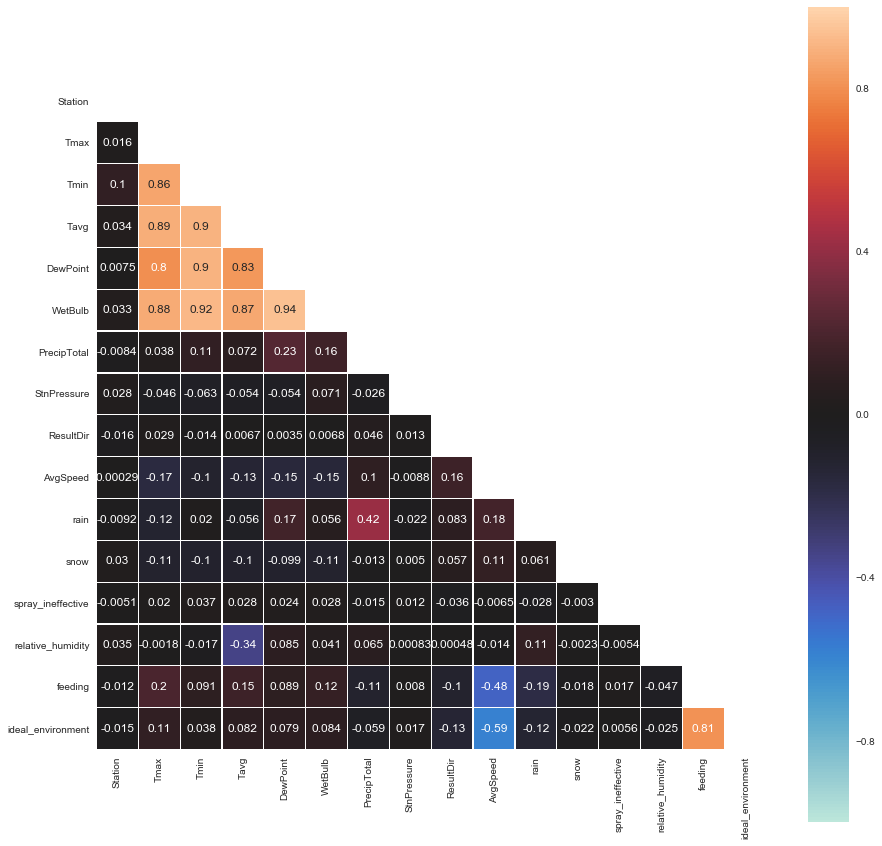

In [92]:
sns.set(style="white")

corr = weather.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(corr, annot = True, mask=mask, vmin = -1, vmax= 1, center=0,
            square=True, linewidths=.3);

---------
# Train: 
-------- 

- Date                     : Type = object - YEAR/MM/DD - Values: 2007-06-29 through 2013-09-26
- Address                  : Type = object - `DROP`*
- Species                  : Type = object - 7 Species:

    - `CULEX TERRITANS` 
    - `CULEX TARSALIS` 
    - `CULEX SALINARIUS`
    - `CULEX RESTUANS` : West Nile Virus is Presesnt among `0.017883` of this species.
    - `CULEX PIPIENS/RESTUANS` : West Nile Virus is Presesnt among `0.055135` of this species.
    - `CULEX PIPIENS` : West Nile Virus is Presesnt among `0.088922` of this species.
    - `CULEX ERRATICUS`
    

- Block                    : Type = int64 - `DROP`*
- Street                   : Type = object - `DROP`*
- Trap                     : Type = object - Values = T001 through T903 with `T094B` and `T054C` included
- AddressNumberAndStreet   : Type = object - `DROP`*
- Latitude                 : Type = float64 - 41.644612 through 42.01743
- Longitude                : Type = float64 - -87.531635 through -87.930995
- AddressAccuracy          : Type = int64 - Accuracy returned from GeoCoder - Values = 9, 8, 5, 3
- NumMosquitos             : Type = int64 - Number of mosquitoes caught in this trap - Values = 1 through 50
- WnvPresent               : Type = int64 - ~ 0.052 of Mosquitoes have the West Nile Virus Present

*= Temporarily 

In [93]:
train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [94]:
train.WnvPresent.sort_values(ascending = False).unique()

array([1, 0])

In [95]:
train.WnvPresent.sort_values(ascending = False).mean()

0.05244622120692937

In [96]:
train.groupby('Species').WnvPresent.unique()

Species
CULEX ERRATICUS              [0]
CULEX PIPIENS             [0, 1]
CULEX PIPIENS/RESTUANS    [0, 1]
CULEX RESTUANS            [0, 1]
CULEX SALINARIUS             [0]
CULEX TARSALIS               [0]
CULEX TERRITANS              [0]
Name: WnvPresent, dtype: object

In [97]:
train.groupby('Species').WnvPresent.mean()

Species
CULEX ERRATICUS           0.000000
CULEX PIPIENS             0.088922
CULEX PIPIENS/RESTUANS    0.055135
CULEX RESTUANS            0.017883
CULEX SALINARIUS          0.000000
CULEX TARSALIS            0.000000
CULEX TERRITANS           0.000000
Name: WnvPresent, dtype: float64

In [98]:
train[train['WnvPresent'] == True].sort_values('Species').head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
2384,2007-08-22,"1700 West 95th Street, Chicago, IL 60643, USA",CULEX PIPIENS,17,W 95TH ST,T094,"1700 W 95TH ST, Chicago, IL",41.720848,-87.666014,9,28,1
2496,2007-08-22,"2400 East 105th Street, Chicago, IL 60617, USA",CULEX PIPIENS,24,E 105TH ST,T128,"2400 E 105TH ST, Chicago, IL",41.704572,-87.565666,8,50,1


In [99]:
sum(train.Species.value_counts())

10506

In [100]:
train.groupby('Species').WnvPresent.mean();

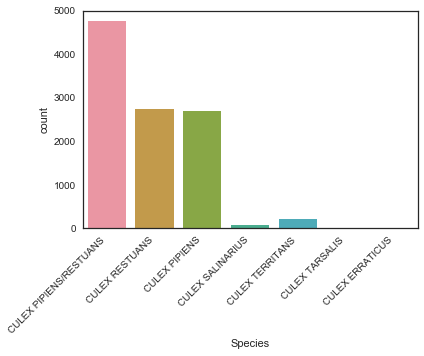

In [101]:
sns.countplot(x='Species', data=train)
plt.xticks(rotation=45, ha='right');

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

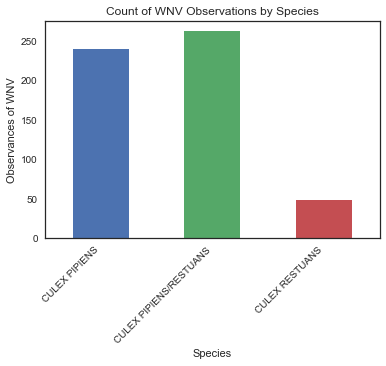

In [102]:
train[train['WnvPresent']==1].groupby('Species').WnvPresent.count().plot(kind='bar')
plt.ylabel('Observances of WNV')
plt.xlabel('Species')
plt.title('Count of WNV Observations by Species')
plt.xticks(rotation=45, ha='right')

In [103]:
train.Species.value_counts()

CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: Species, dtype: int64

In [104]:
train.groupby('Species').WnvPresent.mean()

Species
CULEX ERRATICUS           0.000000
CULEX PIPIENS             0.088922
CULEX PIPIENS/RESTUANS    0.055135
CULEX RESTUANS            0.017883
CULEX SALINARIUS          0.000000
CULEX TARSALIS            0.000000
CULEX TERRITANS           0.000000
Name: WnvPresent, dtype: float64

----------
# Spray
------------

In [105]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [106]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [107]:
spray.Date = pd.to_datetime(spray.Date, dayfirst=True)

In [108]:
spray.Date.value_counts()

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2011-09-07    2114
2013-07-25    1607
2013-08-22    1587
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: Date, dtype: int64

In [109]:
spray.Time = spray.Time.map(lambda x: '0' + x if len(str(x))==10 else x)

In [110]:
spray.sort_values('Time', ascending=False);

In [111]:
spray.Date.sort_values(ascending = False).head()

14834   2013-09-05
14226   2013-09-05
14224   2013-09-05
14223   2013-09-05
14222   2013-09-05
Name: Date, dtype: datetime64[ns]

In [112]:
spray.Time.value_counts();

In [113]:
# spray['year'] = spray.Date.str[:4]
# spray['month'] = spray.Date.str[5:7]
# spray['day'] = spray.Date.str[-2:]

# Feature Engineering:

------------

In [114]:
train[['Trap', 'Date', 'Species']].duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [115]:
cols = [col for col in train.columns if col not in ['NumMosquitos', 'WnvPresent']]
train = train.groupby(cols, as_index=False).sum()
train['WnvPresent'] = (train.WnvPresent>0).astype(int)

In [116]:
dfll = train.groupby(['Latitude', 'Longitude'],as_index=False).mean().copy()

In [117]:
dfll.head()

,Latitude,Longitude,Block,AddressAccuracy,NumMosquitos,WnvPresent
0,41.644612,-87.604498,82.0,5.0,8.600000,0.066667
1,41.659112,-87.538693,40.0,8.0,18.467391,0.076087
2,41.662014,-87.724608,42.0,8.0,21.238095,0.054422
3,41.673408,-87.599862,12.0,5.0,151.524476,0.104895
4,41.678618,-87.559308,13.0,5.0,13.680000,0.010000


In [118]:
dfll.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 137
Data columns (total 6 columns):
Latitude           138 non-null float64
Longitude          138 non-null float64
Block              138 non-null float64
AddressAccuracy    138 non-null float64
NumMosquitos       138 non-null float64
WnvPresent         138 non-null float64
dtypes: float64(6)
memory usage: 7.5 KB


In [119]:
str(dfll.Latitude[0])+ ', '+ str(dfll.Longitude[0])

'41.644612, -87.60449799999999'

In [120]:
dfll['Coor'] = dfll.apply(lambda x: str(x.Latitude) +', ' + str(x.Longitude), axis=1)

In [121]:
dfll.head()

,Latitude,Longitude,Block,AddressAccuracy,NumMosquitos,WnvPresent,Coor
0,41.644612,-87.604498,82.0,5.0,8.600000,0.066667,"41.644612, -87.60449799999999"
1,41.659112,-87.538693,40.0,8.0,18.467391,0.076087,"41.659112, -87.53869300000001"
2,41.662014,-87.724608,42.0,8.0,21.238095,0.054422,"41.662014, -87.72460799999999"
3,41.673408,-87.599862,12.0,5.0,151.524476,0.104895,"41.673408, -87.599862"
4,41.678618,-87.559308,13.0,5.0,13.680000,0.010000,"41.678618, -87.559308"


In [122]:
#!pip install geopy

In [123]:
import geopy.distance

In [124]:
#geopy.distance.vincenty(dfll.Coor).miles